## Mexico NIV short term prediction

*Based on model "WORKLOAD FORECASTING FOR A CALL CENTER: METHODOLOGY AND A CASE STUDY " by Sivan Aldor-Noiman, Paul D. Feigin and Avishai Mandelbaum. In further text denoted as [1] *

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

*Making raw dataframe from xls provided by STEN!*

In [2]:
df_raw=pd.read_excel('vMexicoToSpanishNIV.xlsx',header=0)

**Inital exploration of data**

In [3]:
df_raw.head()

,TaskOrder,SkillName,Country,row_date,starttime,acdcalls,acdtime
0,Mexico TO,Spanish NIV,Mexico,2017-08-20,0,0,0
1,Mexico TO,Spanish NIV,Mexico,2017-08-20,30,0,0
2,Mexico TO,Spanish NIV,Mexico,2017-08-20,100,0,0
3,Mexico TO,Spanish NIV,Mexico,2017-08-20,130,0,0
4,Mexico TO,Spanish NIV,Mexico,2017-08-20,200,0,0


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10978 entries, 0 to 10977
Data columns (total 7 columns):
TaskOrder    10978 non-null object
SkillName    10978 non-null object
Country      10978 non-null object
row_date     10978 non-null datetime64[ns]
starttime    10978 non-null int64
acdcalls     10978 non-null int64
acdtime      10978 non-null int64
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 600.4+ KB


*Droping 'TaskOrder','SkillName','Country' columns because they don't have any information*

In [5]:
df_raw=df_raw.drop(['TaskOrder','SkillName','Country'],axis=1)

*Getting right time indexing*

In [6]:
df_raw['strDate']=df_raw['row_date'].apply(str)

In [7]:
df_raw['strPeriod']=df_raw['starttime'].apply(str)

In [8]:
def to_timeFormat(int_period):
    if len(int_period)==1:
        return '00:00'
    elif len(int_period)==2:
        return '00:30'
    elif len(int_period)==3:
        return '0'+int_period[0]+':'+int_period[1:]
    else:
        return int_period[:2]+':'+int_period[2:]

In [9]:
df_raw['strPeriod']=df_raw['strPeriod'].apply(to_timeFormat)

In [10]:
df_raw.head()

,row_date,starttime,acdcalls,acdtime,strDate,strPeriod
0,2017-08-20,0,0,0,2017-08-20 00:00:00,00:00
1,2017-08-20,30,0,0,2017-08-20 00:00:00,00:30
2,2017-08-20,100,0,0,2017-08-20 00:00:00,01:00
3,2017-08-20,130,0,0,2017-08-20 00:00:00,01:30
4,2017-08-20,200,0,0,2017-08-20 00:00:00,02:00


In [11]:
def reduce_strDate(strDate):
    return strDate[:10]

In [12]:
df_raw['strDate']=df_raw['strDate'].apply(reduce_strDate)

In [13]:
df_raw['Date']=df_raw['strDate']+' ' +df_raw['strPeriod']

In [14]:
df_raw.head()

,row_date,starttime,acdcalls,acdtime,strDate,strPeriod,Date
0,2017-08-20,0,0,0,2017-08-20,00:00,2017-08-20 00:00
1,2017-08-20,30,0,0,2017-08-20,00:30,2017-08-20 00:30
2,2017-08-20,100,0,0,2017-08-20,01:00,2017-08-20 01:00
3,2017-08-20,130,0,0,2017-08-20,01:30,2017-08-20 01:30
4,2017-08-20,200,0,0,2017-08-20,02:00,2017-08-20 02:00


In [15]:
df_raw['Date']=pd.to_datetime(df_raw['Date'])

In [16]:
df_raw.set_index('Date',inplace=True)

*Checking for duplicate indexes*

In [17]:
df_raw.index.get_duplicates()

DatetimeIndex(['2017-10-29 02:00:00', '2017-10-29 02:30:00'], dtype='datetime64[ns]', freq=None)

*Exploring duplicated data*

In [18]:
df_raw[df_raw.index.duplicated(keep=False)]

,row_date,starttime,acdcalls,acdtime,strDate,strPeriod
Date,,,,,,
2017-10-29 02:00:00,2017-10-29,200,0,0,2017-10-29,02:00
2017-10-29 02:00:00,2017-10-29,200,0,0,2017-10-29,02:00
2017-10-29 02:30:00,2017-10-29,230,0,0,2017-10-29,02:30
2017-10-29 02:30:00,2017-10-29,230,0,0,2017-10-29,02:30


*Since duplicated rows have same data (namely zeros) we can delete either of the rows*

In [19]:
x = df_raw.drop_duplicates()
x.loc['2017-10-29 02:00:00':'2017-10-29 03:00:00']

,row_date,starttime,acdcalls,acdtime,strDate,strPeriod
Date,,,,,,
2017-10-29 02:00:00,2017-10-29,200,0,0,2017-10-29,02:00
2017-10-29 02:30:00,2017-10-29,230,0,0,2017-10-29,02:30
2017-10-29 03:00:00,2017-10-29,300,0,0,2017-10-29,03:00


In [20]:
df_raw.head()

,row_date,starttime,acdcalls,acdtime,strDate,strPeriod
Date,,,,,,
2017-08-20 00:00:00,2017-08-20,0,0,0,2017-08-20,00:00
2017-08-20 00:30:00,2017-08-20,30,0,0,2017-08-20,00:30
2017-08-20 01:00:00,2017-08-20,100,0,0,2017-08-20,01:00
2017-08-20 01:30:00,2017-08-20,130,0,0,2017-08-20,01:30
2017-08-20 02:00:00,2017-08-20,200,0,0,2017-08-20,02:00


In [21]:
df_raw = x

*Adjusting to Mexico time zone (Central zone,-7 hours from UTC+1)*


In [22]:
df_mex=df_raw.tshift(-7, freq='H')

In [23]:
df_mex.head()

,row_date,starttime,acdcalls,acdtime,strDate,strPeriod
Date,,,,,,
2017-08-19 17:00:00,2017-08-20,0,0,0,2017-08-20,00:00
2017-08-19 17:30:00,2017-08-20,30,0,0,2017-08-20,00:30
2017-08-19 18:00:00,2017-08-20,100,0,0,2017-08-20,01:00
2017-08-19 18:30:00,2017-08-20,130,0,0,2017-08-20,01:30
2017-08-19 19:00:00,2017-08-20,200,0,0,2017-08-20,02:00


*Setting the Period column*

In [24]:
df_mex=df_mex.reset_index()
df_mex['Period']=df_mex['Date'].apply(datetime.datetime.time)
df_mex['Date']=pd.to_datetime(df_mex['Date'])
df_mex.set_index('Date',inplace=True)
df_mex.head()

,row_date,starttime,acdcalls,acdtime,strDate,strPeriod,Period
Date,,,,,,,
2017-08-19 17:00:00,2017-08-20,0,0,0,2017-08-20,00:00,17:00:00
2017-08-19 17:30:00,2017-08-20,30,0,0,2017-08-20,00:30,17:30:00
2017-08-19 18:00:00,2017-08-20,100,0,0,2017-08-20,01:00,18:00:00
2017-08-19 18:30:00,2017-08-20,130,0,0,2017-08-20,01:30,18:30:00
2017-08-19 19:00:00,2017-08-20,200,0,0,2017-08-20,02:00,19:00:00


*Getting rid of redundant columns and renaming:*

In [25]:
df_mex=df_mex.drop(['row_date','starttime','strDate','strPeriod'],axis=1)
df_mex.rename({'acdcalls':'Calls','acdtime':'Time'},axis='columns',inplace=True)
df_mex.head()

,Calls,Time,Period
Date,,,
2017-08-19 17:00:00,0,0,17:00:00
2017-08-19 17:30:00,0,0,17:30:00
2017-08-19 18:00:00,0,0,18:00:00
2017-08-19 18:30:00,0,0,18:30:00
2017-08-19 19:00:00,0,0,19:00:00


*Removing rows when call center is closed*

In [26]:
df_mex_alltime=df_mex

In [27]:
df_mex=df_mex_alltime[df_mex_alltime.index.hour >=8]
df_mex=df_mex[df_mex.index.hour < 20]

In [28]:
len(df_mex)

5480

*Adding the 'Weekday' column which gives information about the day of the week for the data example. 0=Monday, Sunday=6*

In [29]:
df_mex=df_mex.reset_index()

In [30]:
from datetime import datetime
df_mex['Weekday']=df_mex['Date'].apply(datetime.weekday)

In [31]:
df_mex=df_mex.set_index('Date')
df_mex.head()

,Calls,Time,Period,Weekday
Date,,,,
2017-08-19 17:00:00,0,0,17:00:00,5
2017-08-19 17:30:00,0,0,17:30:00,5
2017-08-19 18:00:00,0,0,18:00:00,5
2017-08-19 18:30:00,0,0,18:30:00,5
2017-08-19 19:00:00,0,0,19:00:00,5


*Ploting number of calls per day*

In [61]:
df_mex_daily=df_mex.resample('D').sum()
df_mex_daily=df_mex_daily.reset_index()
df_mex_daily['Weekday']=df_mex_daily['Date'].apply(datetime.weekday)
df_mex_daily=df_mex_daily.set_index('Date')
df_mex_daily.head()
#df_mex_daily['Calls'].to_csv('Mexico_daily_calls.csv')


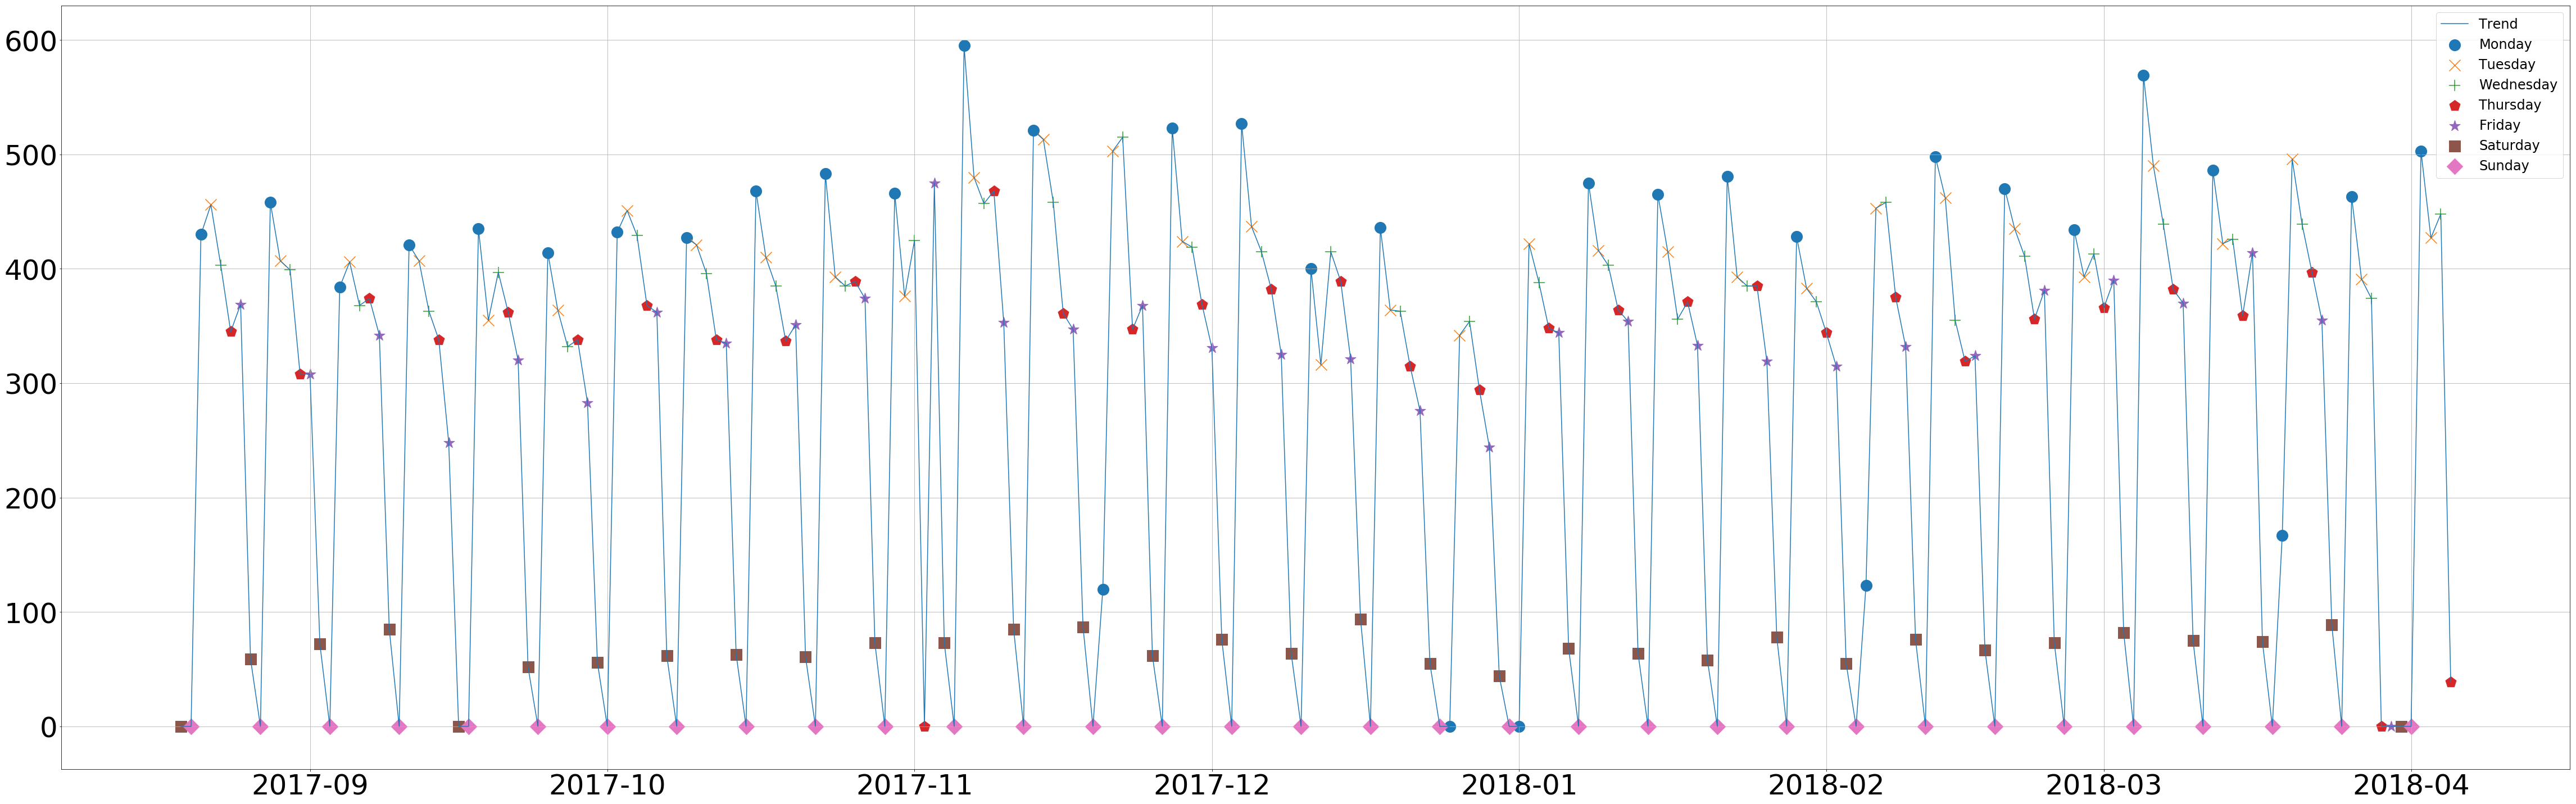

In [33]:
%matplotlib inline
days=[]
markers = ['o', 'x', '+', 'p', '*', 's','D']
weekdays=['Trend','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
fig, ax = plt.subplots(figsize=(80,25))
ax.plot(df_mex_daily.index,df_mex_daily.Calls, '-')
ax.grid()
ax.tick_params(labelsize=50)
for i in range (0,7):
    days.append(df_mex_daily[df_mex_daily['Weekday']==i])
    ax.scatter(days[i].index,days[i].Calls, marker=markers[i],s=400)
ax.legend(weekdays,fontsize=24)
    


We see that call center doesn't operate on Sundays so we'll delete these rows

In [34]:
df_mex=df_mex[df_mex['Weekday']!=6]
df_mex_daily=df_mex_daily[df_mex_daily['Weekday']!=6]
len(df_mex_daily)
len(df_mex)

4688

*As suggested in Aldor-Noiman et al we discard outliers in the learning stage. <br>First we detect outliers on daily level* 

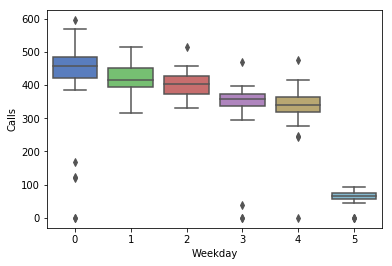

In [35]:
sns.boxplot(x='Weekday',y="Calls",data=df_mex_daily, whis=1.5, palette="muted")

In [36]:
whis=1.5
bitmask=pd.Series(np.ones(len(df_mex_daily)))
bitmask.index=df_mex_daily.index
outliers_index=[]
for i in range (0,6):
    q25, q75 = np.percentile(df_mex_daily.Calls[df_mex_daily.Weekday == i], 25), np.percentile(df_mex_daily.Calls[df_mex_daily.Weekday == i], 75)
    iqr = q75 - q25
    lower, upper = q25 - iqr*whis, q75 + iqr*whis
    for index in df_mex_daily.index:
        x=df_mex_daily.loc[index]['Calls']
        if (df_mex_daily.Weekday[index] == i and (x<lower or x>upper)):
            bitmask[index]=0
            outliers_index.append(index.date())
df_mex_daily_trimmed=df_mex_daily[bitmask==1]   
df_mex_daily_trimmed.info()
len(outliers_index)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2017-08-21 to 2018-04-04
Data columns (total 3 columns):
Calls      179 non-null int64
Time       179 non-null int64
Weekday    179 non-null int64
dtypes: int64(3)
memory usage: 5.6 KB


18

In [37]:
df_mex_trimmed=df_mex
i=0
for index in df_mex.index:
    if index.date() in outliers_index:
        df_mex_trimmed.drop(index,inplace=True)
        i+=1
df_mex_trimmed.info()
len(df_mex)
print(i)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4294 entries, 2017-08-21 08:00:00 to 2018-04-04 19:30:00
Data columns (total 4 columns):
Calls      4294 non-null int64
Time       4294 non-null int64
Period     4294 non-null object
Weekday    4294 non-null int64
dtypes: int64(3), object(1)
memory usage: 167.7+ KB
394


*Now we plot averaged normalized number of calls per period of the day for different weekdays.
<br> Below we define average number of calls per period for each day:*

In [38]:
df_mex_daily_trimmed['per_period_avg']=df_mex_daily_trimmed.loc[:,'Calls'].apply(lambda x: x/24)


/home/analyst/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_mex_daily_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2017-08-21 to 2018-04-04
Data columns (total 4 columns):
Calls             179 non-null int64
Time              179 non-null int64
Weekday           179 non-null int64
per_period_avg    179 non-null float64
dtypes: float64(1), int64(3)
memory usage: 7.0 KB


In [40]:
len(df_mex_daily_trimmed[df_mex_daily_trimmed['per_period_avg']==0])

0

*Adding normalized calls column to our dataframe*

In [41]:
norm_per =[]
for index in df_mex_trimmed.index:
    try:
        a = df_mex_trimmed['Calls'][index]
        b = df_mex_daily_trimmed['per_period_avg'][index.date()] 
        norm_per.append(a/b)
    except ValueError:
        print(index)
df_mex_trimmed['period_avg']=norm_per
df_mex_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4294 entries, 2017-08-21 08:00:00 to 2018-04-04 19:30:00
Data columns (total 5 columns):
Calls         4294 non-null int64
Time          4294 non-null int64
Period        4294 non-null object
Weekday       4294 non-null int64
period_avg    4294 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 361.3+ KB


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ]),
 <a list of 8 Text yticklabel objects>)

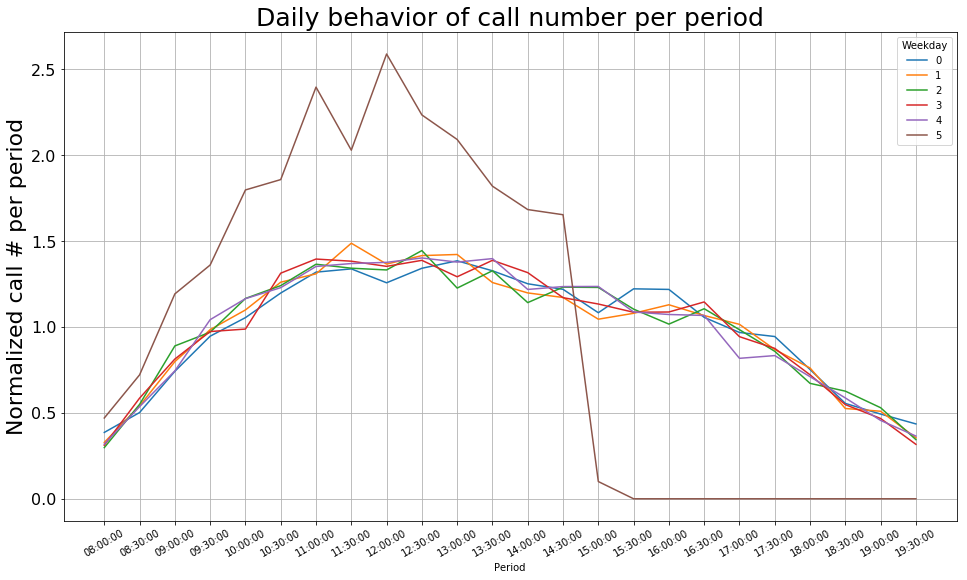

In [42]:

grouped=df_mex_trimmed.groupby(['Weekday','Period']).mean() 
# This will give hierarchical index with 'Weekday' as 
# level zero and 'Period' as level one. So I we'll get average over weekday and period with .mean()
x_tick=['08:00', '08:30', '09:00', '09:30', '10:00:00', '10:30', '11:00',
       '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30',
       '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00',
       '18:30', '19:00', '19:30']
grouped['period_avg'].unstack(level=0).plot(kind='line',grid=True,xticks=x_tick, figsize =(16,9),rot=30)
# .unstack(level=0) will put level zero of multiindex to column index and then every column is drawnb
plt.title('Daily behavior of call number per period', fontsize=25)
plt.ylabel('Normalized call # per period', fontsize=22)
plt.yticks(fontsize=16)
#plt.savefig('by_period.png', dpi=300, bbox_inches='tight')

*Plotting average call duration per weekday and per period of the day *

*In order to make average call duration we divide call duration and call number and store that in new column*

In [43]:
df_mex_trimmed['duration_avg']=df_mex_trimmed['Time']/df_mex_trimmed['Calls']
df_mex_trimmed.head()

,Calls,Time,Period,Weekday,period_avg,duration_avg
Date,,,,,,
2017-08-21 08:00:00,5,890,08:00:00,0,0.279070,178.000000
2017-08-21 08:30:00,10,2424,08:30:00,0,0.558140,242.400000
2017-08-21 09:00:00,9,1610,09:00:00,0,0.502326,178.888889
2017-08-21 09:30:00,14,1949,09:30:00,0,0.781395,139.214286
2017-08-21 10:00:00,17,4730,10:00:00,0,0.948837,278.235294


*Plotting*

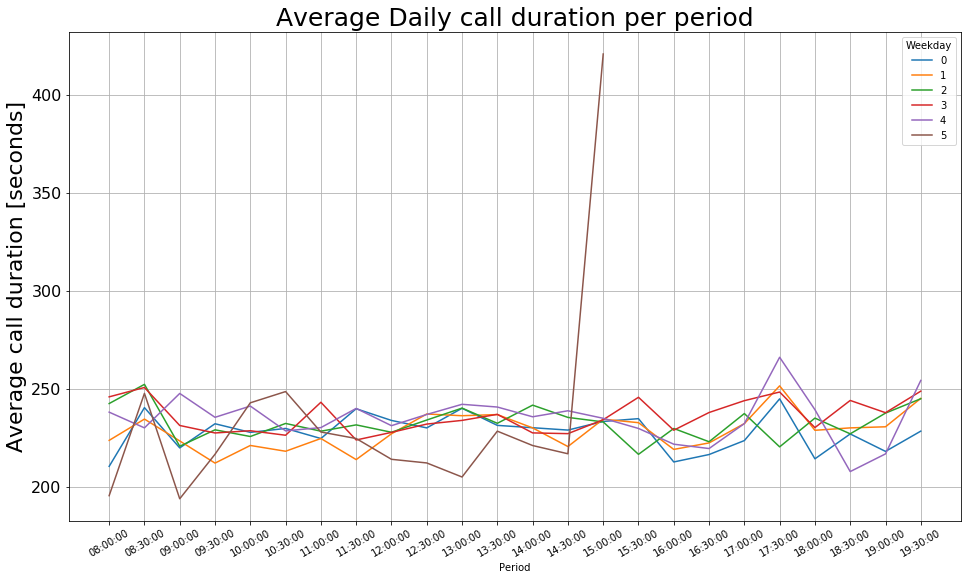

In [44]:
grouped=df_mex_trimmed.groupby(['Weekday','Period']).mean() 
grouped['duration_avg'].unstack(level=0).plot(kind='line',grid=True,xticks=x_tick, figsize =(16,9),rot=30)
plt.title('Average Daily call duration per period', fontsize=25)
plt.ylabel('Average call duration [seconds]', fontsize=22)
plt.yticks(fontsize=16)
plt.savefig('duration_by_period.png', dpi=300, bbox_inches='tight')

We see that there is huge jump for last half-hour period on Saturday. Let's inspect that a bit more

Let's see how many call is there for this period aggregated over all Saturdays in our dataset (which is thirty weeks)

In [45]:
def Weekday(i):
    """
    Function 'Weekday' returns mex_trimmed dataframe for selected day. 
    0 = Monday , 5 = Saturday and similar for other days
    """
    return df_mex_trimmed[df_mex_trimmed['Weekday'] == i]


In [46]:
Weekday(5).groupby('Period').sum()['Calls']

Period
08:00:00     39
08:30:00     65
09:00:00    102
09:30:00    121
10:00:00    154
10:30:00    161
11:00:00    209
11:30:00    178
12:00:00    223
12:30:00    188
13:00:00    184
13:30:00    161
14:00:00    142
14:30:00    146
15:00:00      9
15:30:00      0
16:00:00      0
16:30:00      0
17:00:00      0
17:30:00      0
18:00:00      0
18:30:00      0
19:00:00      0
19:30:00      0
Name: Calls, dtype: int64

We see that there is only 9 calls for 14:30 - 15:00 period for thirty Saturdays so we will omit this point on above graph as non-representative

In the graph given above we have average values. Lets see how much call durations vary by calculating standard deviations. First let's do that for whole duration_avg column in mex_trimmed dataset:

In [47]:
df_mex_trimmed['duration_avg'].std()

55.94352725439427

*Checking wheter distribution is normal*

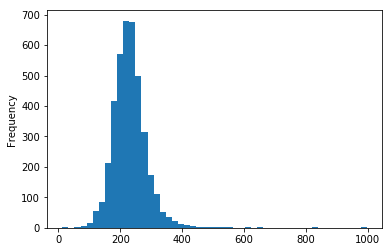

In [48]:
df_mex_trimmed['duration_avg'].plot(kind='hist',bins=50)

*Drawing qqplot (jer smo u mogucnost :D ) *

In [49]:
from statsmodels.graphics.gofplots import qqplot

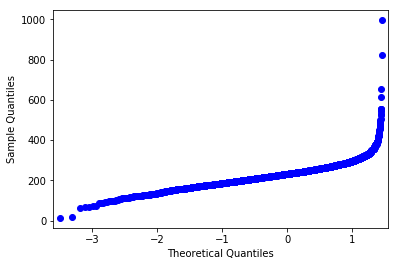

In [50]:
qqplot(df_mex_trimmed['duration_avg'].values)
plt.show()

*Checking standard deviation for each day:*

In [51]:
for i in range (0,6):
    print(Weekday(i)['duration_avg'].std())

44.19294194267139
45.981431718298374
50.973329595518074
54.201784345312475
54.26766841166125
91.81650200049354


We see that for all days except Saturday std is similar so we can conclude that duration of calls doesn't vary that much and that we can use mean values of call durations when predicting workload

**Modelling**

*Introducing sparse matrices from scipy library and an example*

In [52]:
from scipy.sparse import csr_matrix

#First we initiate a matrix 'A' then we put it in sparse form 'sprA' with csr_matrix function and back 
# to dense form 'dnsA' with .todense() method.

A = np.array([[1,0,0,0,7],[0,0,5,0,0],[9,0,0,0,2]])
print (A)
sprA = csr_matrix(A)
print(sprA)
dnsA = sprA.todense()
print(dnsA)

# for more sparse matrix stuff check https://docs.scipy.org/doc/scipy/reference/sparse.html

[[1 0 0 0 7]
 [0 0 5 0 0]
 [9 0 0 0 2]]
  (0, 0)	1
  (0, 4)	7
  (1, 2)	5
  (2, 0)	9
  (2, 4)	2
[[1 0 0 0 7]
 [0 0 5 0 0]
 [9 0 0 0 2]]


*We begin with model implementation. Reader is advised to look at model description in [1] page 11 onwards.*

*First we employ variance stabilizing transformation ('https://en.wikipedia.org/wiki/Variance-stabilizing_transformation) on the 'Calls' column of dataframe. Transformation is $$ y_{dk} = \sqrt {N_{dk}+\frac{1}{4} } $$  (Check [1] for meaning of $ y_{dk} $ and $ N_{dk} $). By performing this transformation we get the data with known variance ($ \sigma \approx \frac {1}{4}$) and we can apply Gaussian mixed linear model approach in which $ \sqrt {\lambda_{dk}} $  is **linear** function of both fixed and random effects. *

In [53]:
def var_stab(x):
    return np.sqrt(x+1/4)

df_mex_trimmed['tCalls'] = df_mex_trimmed['Calls'].apply(var_stab)

*Modelling of fixed effects*

The fixed effects include the weekday effects and the interaction between them and the period effects. With these two effects, we capture the weekday differences in daily levels and intra-day profiles. We start by modelling day-level fixed effects.

First we create a design matrix for day of the week fixed effects. (Check page 12 of [1])

In [54]:
df_fix_daily=pd.DataFrame(index=df_mex_daily.index, columns=range(6))
df_fix_daily[:]=0
for index in df_mex_daily.index:
    df_fix_daily.loc[index,df_mex_daily['Weekday'][index]]=1
    
print(df_fix_daily.head())
df_mex_daily.head()

            0  1  2  3  4  5
Date                        
2017-08-19  0  0  0  0  0  1
2017-08-21  1  0  0  0  0  0
2017-08-22  0  1  0  0  0  0
2017-08-23  0  0  1  0  0  0
2017-08-24  0  0  0  1  0  0


,Calls,Time,Weekday
Date,,,
2017-08-19,0,0,5
2017-08-21,430,88061,0
2017-08-22,456,85189,1
2017-08-23,403,79796,2
2017-08-24,345,67239,3
